In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_7_descriptive = get_prompt("descriptive", 7)
prompt_7_natural = get_prompt("natural", 7)

prompt_7_descriptive, prompt_7_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area).',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the simulation.')

In [3]:
llm_model = "gpt-4o-2024-08-06"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_7_descriptive)

Thought: To complete the tasks, I will proceed step-by-step using the appropriate tools. First, I will download the PDB file for 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
To continue with the tasks, I will now proceed to report the secondary structure assignments of the downloaded PDB structure 1LYZ.

Action:
```json
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_023405",
    "target_frames": "first"
  }
}
```To continue with the tasks, I will now find any known binding or active sites for the protein 1LYZ.

Action:
```json
{
  "action": "GetAllKnownSites",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": ""
  }
}
```To continue with the tasks, I will now set up and run a short simulation of the protein 1LYZ for 1 picosecond at 300 K.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_023405",
    "forcefield_files": ["ambe

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_023405: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_023405
 rec0_023406: dssp values for trajectory with id: 1LYZ_023405
 1LYZ_023424: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_023429: Initial positions for simulation sim0_023429
 sim0_023429: Basic Simulation of Protein 1LYZ_023424
 rec0_023429: Simulation trajectory for protein 1LYZ_023424 and simulation sim0_023429
 rec1_023429: Simulation state log for protein 1LYZ_023424 and simulation sim0_023429
 rec2_023429: Simulation pdb frames for protein 1LYZ_023424 and simulation sim0_023429
 rmsd_023429: RMSD for 023429
 fig0_023435: RMSD plot for 023429
 rgy_rec0_023429: Radii of gyration per frame for rec0_023429
 fig0_023436: Plot of radii of gyration over time for rec0_023429
 sasa_sim0_023429: Total SASA values for sim0_023429
 fig0_023440: Plot of SASA over time fo

In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_023405"))

In [15]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_023405", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [14]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [13]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_023429")
top_path_1 = registry_1.get_mapped_path("top_sim0_023429")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

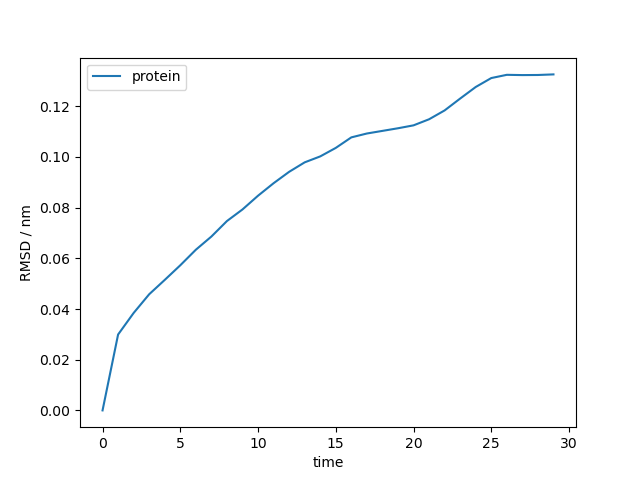

In [12]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023435'))

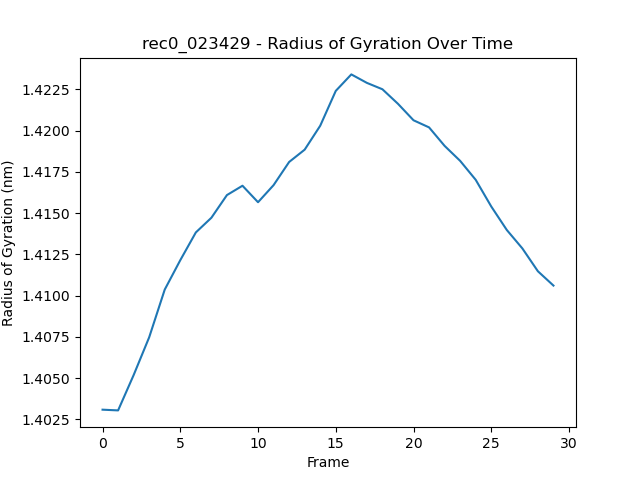

In [11]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023436'))

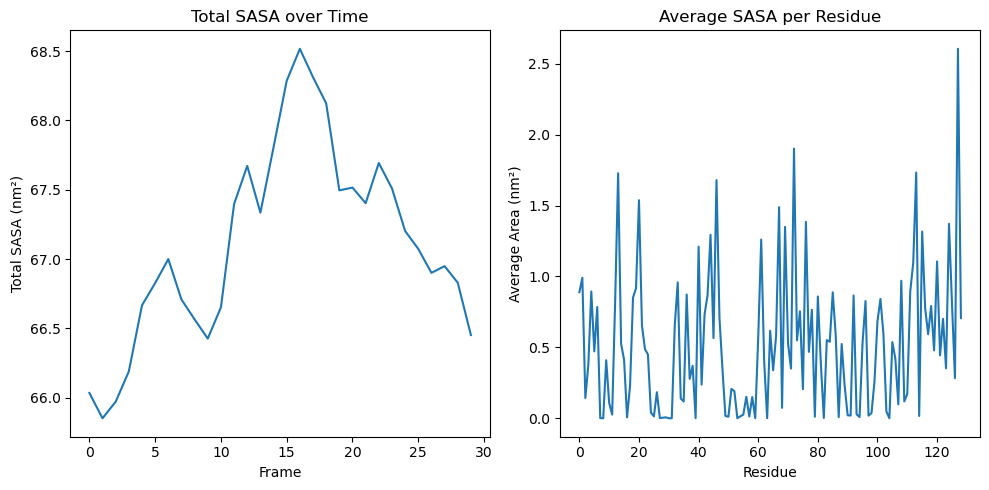

In [10]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023440'))

In [16]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_7_natural)

Thought: To address the question, I need to perform several tasks: download the PDB file for 1LYZ, simulate it for 1 picosecond at 300 K, report the secondary structure assignments, identify any known binding or active sites, and compute the RMSD, SASA, and radius of gyration. I will start by downloading the PDB file for 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file for 1LYZ, I will proceed with setting up and running a short simulation for 1 picosecond at 300 K. After the simulation, I will analyze the secondary structure assignments, known binding or active sites, RMSD, SASA, and radius of gyration. Let's start by setting up and running the simulation.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_023823",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod"

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [18]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_023823: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_023823
 1LYZ_023830: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_023834: Initial positions for simulation sim0_023834
 sim0_023834: Basic Simulation of Protein 1LYZ_023830
 rec0_023834: Simulation trajectory for protein 1LYZ_023830 and simulation sim0_023834
 rec1_023834: Simulation state log for protein 1LYZ_023830 and simulation sim0_023834
 rec2_023834: Simulation pdb frames for protein 1LYZ_023830 and simulation sim0_023834
 rec0_023839: dssp values for trajectory with id: rec0_023834
 rmsd_023834: RMSD for 023834
 fig0_023850: RMSD plot for 023834
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_023853: Plot of SASA over time for 1LYZ
 rgy_rec0_023834: Radii of gyration per frame for rec0_023834
 fig0_023856: Plot of radii of gyration over time for rec0_023834


In [20]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_023823"))

In [29]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_023823", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [28]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [27]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_023834")
top_path_2 = registry_2.get_mapped_path("top_sim0_023834")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

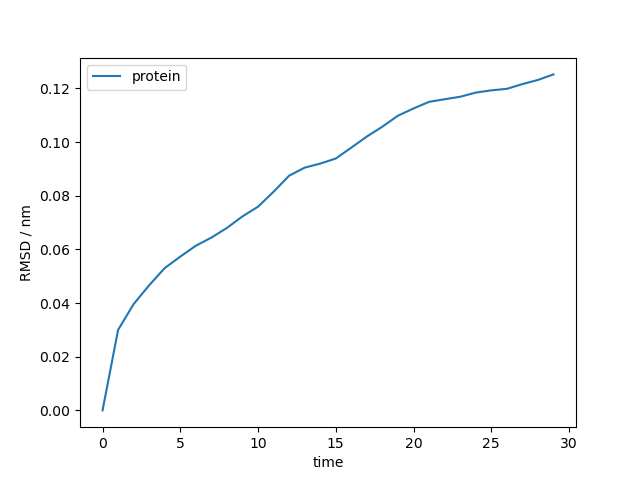

In [26]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_023850'))

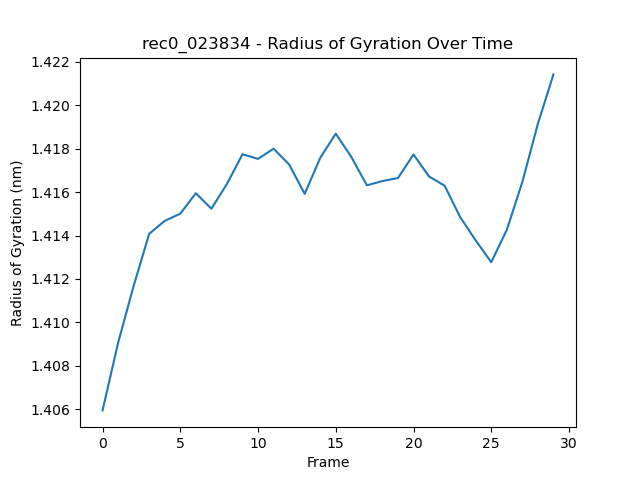

In [25]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_023856'))

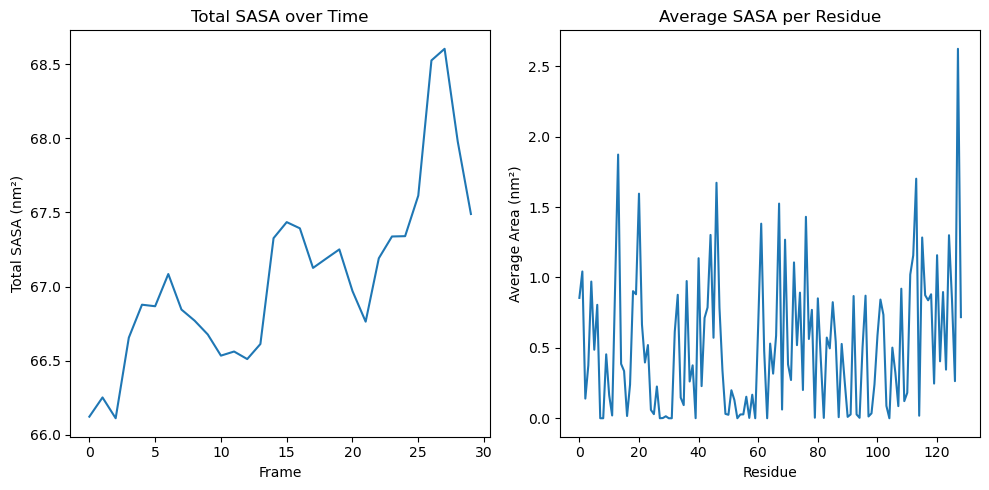

In [24]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_023853'))